## **1. Brief description of the problem and data (5 pts)**
### **1.1 Issue Overview**
This project will participate in a Kaggle competition.

https://www.kaggle.com/c/nlp-getting-started/overview

In this assignment I have to categorize text into two groups. Determining if a tweet is discussing a disaster or not real events are involved as part of the task, at hand in this Natural Language Processing ( NLP) project which is, about helping machines comprehend and analyze human language.


### **1.2 Natural Language Processing (NLP)**
Natural Language Processing (or NLP) is an area, within intelligence that centers around how computers and human language interact, with each other effectively and meaningfully. It covers activities like organizing text into categories based classification purposes or understanding the context in which certain languages are used for translation purposes. For this assignment we are working with text categorization using tweets which are divided into two groups;

1: The tweet refers to a real disaster.
0: The tweet is not related to a real disaster (it could be a casual remark, metaphor, or joke).

Transformer models such, as **BERT** and **DistilBERT** are widely utilized in natural language processing tasks due, to their ability to grasp the intended meaning and context of words and sentences.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step 1: Load the datasets
train_file_path = 'drive/MyDrive/DTSA511/Week4/train.csv'
test_file_path = 'drive/MyDrive/DTSA511/Week4/test.csv'
sample_submission_file_path = 'drive/MyDrive/DTSA511/Week4/sample_submission.csv'

# Reading the data files
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
sample_submission_data = pd.read_csv(sample_submission_file_path)

# Displaying the first few rows of each dataset to understand their structure
train_data_head = train_data.head()
test_data_head = test_data.head()
sample_submission_head = sample_submission_data.head()

# Displaying the first few rows of each dataset to understand their structure
print("Train Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

print("\nSample Submission Head:")
print(sample_submission_data.head())

# Counting the size (rows and columns)
train_size = train_data.shape  # (number of rows, number of columns)
test_size = test_data.shape    # (number of rows, number of columns)

# Display the sizes
print(f"Train Data Size: {train_size[0]} rows, {train_size[1]} columns")
print(f"Test Data Size: {test_size[0]} rows, {test_size[1]} columns")



Train Data Head:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Test Data Head:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in Chin

### **1.3 Dataset Details**
#### **1.3.1. Training Dataset (train.csv)**
Size: 7,613 samples (rows).
Columns:
- id: A unique identifier for each tweet.  
- keyword: A specific keyword extracted from the tweet (optional).  
- location: The location associated with the tweet (optional).  
- text: The actual content of the tweet, which is the main feature for classification.  
- target: The label indicating whether the tweet is about a real disaster (1) or not (0).  

#### **1.3.2. Test Dataset (test.csv)**
Size: 3,263 samples.
Columns:
- id: A unique identifier for each tweet.
- keyword: A keyword extracted from the tweet (optional).
- location: The location associated with the tweet (optional).
- text: The tweet content (used for prediction).

## **2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)**

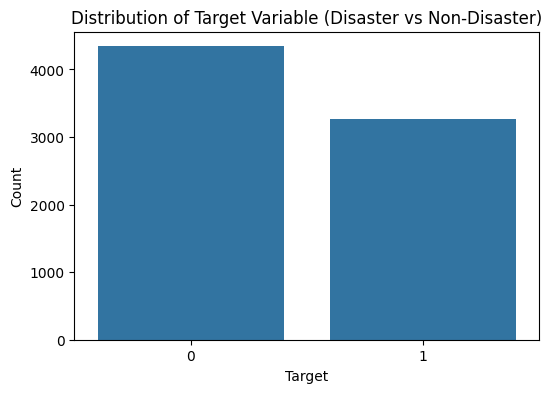

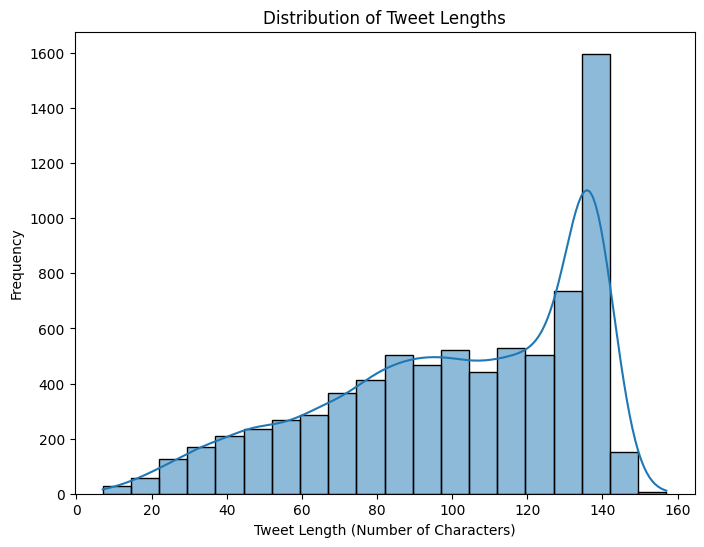

                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                        cleaned_text  
0  our deeds are the reason of this  may allah fo...  
1              forest fire near la ronge sask canada  
2  all residents asked to shelter in place are be...  
3    people receive  evacuation orders in california  
4  just got sent this photo from ruby  as smoke f...  


(id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64,
 id             0
 keyword       26
 location    1105
 text           0
 dtype: int64)

In [16]:
# Step 2: Exploratory Data Analysis (EDA)

# Checking for missing values in train and test data
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Plotting the distribution of the target variable in the training set
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable (Disaster vs Non-Disaster)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Add a column for the length of each tweet (number of characters)
train_data['tweet_length'] = train_data['text'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(8,6))
sns.histplot(train_data['tweet_length'], bins=20, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Cleaning the text data

# Function to clean the text by removing URLs, special characters, and hashtags
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"#\S+", "", text)     # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower().strip()          # Convert to lowercase and remove extra spaces
    return text

# Apply the cleaning function to the 'text' column in both train and test data
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Display the cleaned text for the first few rows in the train dataset
train_data[['text', 'cleaned_text']].head()

# Display cleaned text
print(train_data[['text', 'cleaned_text']].head())

# Display the missing values in the train and test datasets
missing_train, missing_test


### **2.1 Explaining the Visualizations and Data**

#### **2.1.1 Distribution of Target Variable (Disaster vs Non-Disaster Tweets)**
The initial graph displays the spread of the variable indicating whether a tweet discusses a disaster or not.
- 0: Represents tweets that are not about real disasters.
- 1: Represents tweets that are about real disasters.

It appears that there are a number of non-disaster tweets (labeled 0) compared to disaster tweets (labeled 1). It might be necessary to handle this imbalance during model training to prevent bias, towards the class (non disaster).

#### **2.1.1 The lengths of tweets vary widely.**
The second graph shows how long the tweets are, in terms of character count giving an idea of the length of tweets.
- Most tweets typically range from 100, to 140 characters in length. Often peak at, around the 140 character mark.
- It's not surprising considering that tweets are limited, to 280 characters. Shorter tweets tend to be more common, in the dataset.
- Within this range of 20 to 60 characters are some tweets as well.

It's crucial to consider the range of tweet lengths as it plays a role, in making choices regarding text analysis and model selection such as deciding on the approach for longer tweets, in training sessions.


### **2.2. Cleaning Text Data**
I'm able to tidy up the text data by getting rid of characters, like URLs or hashtags and special symbols before classifying the tweets.

## **3. Model Architecture (25 pts)**
I plan to utilize transformer based models such, as BERT and DistilBERT, for this task of classifying tweets into two categories; those related to a disaster and those that are not.

### **3.1 Model 1: DistilBERT.**
DistilBERT is, like a slimmed down BERT model – it maintains, around 97 percent of BERTs capabilities while using six layers instead of twelve.
It operates at a pace and, with better memory usage thanks, to knowledge distillation.
#### What makes DistilBERT special and worth using in this context?
It operates at a speed that's faster and has a size that's smaller compared to BERTs dimensions; this makes it suitable, for settings, with constrained computational capacities or when quicker deductions are necessary.


### **3.2 Model 2: BERT**
BERT is a trained transformer model that utilizes a bidirectional attention mechanism to comprehend the meaning of words by considering both the words that come before and, after, in a sentence.
#### Why Choose BERT?
BERTs bidirectional design allows it to grasp context, from both directions effectively to comprehend vague tweets accurately.
Pre existing knowledge base;" BERTs training results in an understanding of language nuances that can be effectively utilized for refining its performance in this particular assignment."

### **3.3 In summary**
BERT and DistilBERT are both suitable, for this task. BERT excels in performance, with its architecture while DistilBERT offers an inference option that is more resource efficient.

In [17]:
import logging
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
import pandas as pd
import numpy as np

# Step 1: Set up logging for progress tracking
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 2: Tokenization
logger.info("Loading DistilBERT tokenizer...")
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

logger.info("Tokenizing training data for DistilBERT...")
train_texts = train_data['cleaned_text'].tolist()
train_labels = train_data['target'].tolist()
train_encodings = distilbert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)

# Step 3: Convert data into PyTorch format
logger.info("Converting data into PyTorch Dataset format...")
class DisasterDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DisasterDataset(train_encodings, train_labels)

# Step 4: Model Setup for DistilBERT
logger.info("Initializing DistilBERT model for sequence classification...")
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Step 5: Training DistilBERT with detailed progress logging
logger.info("Setting up training arguments and starting DistilBERT training...")

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # log progress every 100 steps
)

trainer = Trainer(
    model=distilbert_model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                             # training arguments, defined above
    train_dataset=train_dataset                     # training dataset
)

logger.info("Training DistilBERT model...")
trainer.train()

# Step 6: Predict using the DistilBERT model
logger.info("Tokenizing test data for DistilBERT predictions...")
test_texts = test_data['cleaned_text'].tolist()

# Tokenize test data
test_encodings = distilbert_tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert test data into PyTorch dataset
logger.info("Converting test data into PyTorch Dataset format...")
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

test_dataset = TestDataset(test_encodings)

# Use the trained DistilBERT model to predict on test dataset
logger.info("Making predictions with the trained DistilBERT model...")

# Perform prediction in batches using DataLoader
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=16)  # Adjust batch size based on memory
distilbert_model.eval()  # Ensure the model is in evaluation mode

predictions = []

# Move model to the same device as the data (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilbert_model.to(device)

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = distilbert_model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        predictions.extend(batch_predictions)

# Ensure the predictions length matches the test data length
logger.info(f"Number of predictions: {len(predictions)}")
logger.info(f"Number of test samples: {len(test_data)}")

if len(predictions) != len(test_data):
    logger.error(f"Prediction length mismatch: {len(predictions)} predictions for {len(test_data)} test samples")
else:
    # Step 7: Prepare the submission for DistilBERT predictions
    logger.info("Saving DistilBERT predictions to CSV...")
    distilbert_submission = pd.DataFrame({
        'id': test_data['id'],
        'target': predictions
    })
    distilbert_submission.to_csv('drive/MyDrive/DTSA511/Week4/distilbert_submission.csv', index=False)
    logger.info("DistilBERT predictions saved successfully.")






/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.656400
200,0.481900
300,0.412200
400,0.446600
500,0.442300
600,0.362900
700,0.386900
800,0.372700
900,0.347600
1000,0.291500


<ipython-input-17-05b26f514d30>:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [18]:
import logging
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader
import torch
import pandas as pd

# Step 8: Repeat the same process for BERT
logger.info("Loading BERT tokenizer...")
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training data for BERT
logger.info("Tokenizing training data for BERT...")
train_encodings_bert = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)
train_dataset_bert = DisasterDataset(train_encodings_bert, train_labels)

# Initialize BERT model for sequence classification
logger.info("Initializing BERT model for sequence classification...")
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Training BERT
logger.info("Training BERT model...")
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # log progress every 100 steps
)

trainer_bert = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset_bert
)

trainer_bert.train()

# Tokenize test data for BERT predictions
logger.info("Tokenizing test data for BERT predictions...")
test_texts = test_data['cleaned_text'].tolist()
test_encodings_bert = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert test data into PyTorch dataset without labels
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create dataset and DataLoader for batch processing
logger.info("Converting test data into PyTorch Dataset format for BERT...")
test_dataset_bert = TestDataset(test_encodings_bert)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=16)

# Ensure model is in evaluation mode
bert_model.eval()

# Move model to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Making predictions in batches
logger.info("Making predictions with the trained BERT model...")
bert_predictions = []

with torch.no_grad():
    for batch in test_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        bert_predictions.extend(batch_predictions)

# Ensure the predictions length matches the test data length
logger.info(f"Number of predictions: {len(bert_predictions)}")
logger.info(f"Number of test samples: {len(test_data)}")

if len(bert_predictions) != len(test_data):
    logger.error(f"Prediction length mismatch: {len(bert_predictions)} predictions for {len(test_data)} test samples")
else:
    # Prepare submission for BERT predictions
    logger.info("Saving BERT predictions to CSV...")
    bert_submission = pd.DataFrame({
        'id': test_data['id'],
        'target': bert_predictions
    })
    bert_submission.to_csv('drive/MyDrive/DTSA511/Week4/bert_submission.csv', index=False)
    logger.info("BERT predictions saved successfully.")



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.629500
200,0.468100
300,0.412800
400,0.461200
500,0.451900
600,0.370300
700,0.398000
800,0.372800
900,0.375100
1000,0.325000


In [21]:
from sklearn.metrics import accuracy_score
from transformers import EvalPrediction

# Define the compute_metrics function
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    return {"accuracy": accuracy_score(p.label_ids, preds)}

# Function to evaluate and store results
def evaluate_model(model_name, train_dataset, val_dataset, learning_rate):
    # Initialize model
    if model_name == 'distilbert':
        model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
    else:
        model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    model.to(device)

    # Set up training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        learning_rate=learning_rate,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,  # Run for a few epochs only for tuning
        evaluation_strategy="steps",
        logging_steps=100,
        eval_steps=500,
        save_steps=500,
        load_best_model_at_end=True,
        logging_dir='./logs',
    )

    # Initialize Trainer with the compute_metrics function
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics  # Pass compute_metrics to Trainer
    )

    # Train the model
    trainer.train()

    # Evaluate the model and return accuracy
    eval_results = trainer.evaluate()
    return eval_results['eval_accuracy']

# Now run the same loop for hyperparameter tuning
learning_rates = [1e-4, 5e-5, 1e-5]
results = {'learning_rate': [], 'accuracy_distilbert': [], 'accuracy_bert': []}

for lr in learning_rates:
    # Train and evaluate DistilBERT
    distilbert_accuracy = evaluate_model('distilbert', train_dataset, val_dataset, lr)

    # Train and evaluate BERT
    bert_accuracy = evaluate_model('bert', train_dataset, val_dataset, lr)

    # Log the results
    results['learning_rate'].append(lr)
    results['accuracy_distilbert'].append(distilbert_accuracy)
    results['accuracy_bert'].append(bert_accuracy)

# Display results as a DataFrame for easier viewing
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)




Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.361700,0.475131,0.817585
1000,0.214200,0.593530,0.797900


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.391100,0.508351,0.804462
1000,0.256200,0.561141,0.821522


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.349900,0.465820,0.820210
1000,0.213200,0.546902,0.822835


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.365500,0.558420,0.790026
1000,0.223200,0.549396,0.825459


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.389700,0.433497,0.821522
1000,0.345700,0.423410,0.825459


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
500,0.379200,0.410305,0.837270
1000,0.322700,0.425642,0.832021


   learning_rate  accuracy_distilbert  accuracy_bert
0        0.00010             0.817585       0.804462
1        0.00005             0.820210       0.825459
2        0.00001             0.825459       0.837270


In [22]:
import logging
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
import numpy as np

# Step 1: Set up logging for progress tracking
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 2: Tokenization
logger.info("Loading DistilBERT tokenizer...")
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

logger.info("Tokenizing training data for DistilBERT...")
train_texts = train_data['cleaned_text'].tolist()
train_labels = train_data['target'].tolist()
train_encodings = distilbert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)

# Step 3: Convert data into PyTorch format
logger.info("Converting data into PyTorch Dataset format...")
class DisasterDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DisasterDataset(train_encodings, train_labels)

# Step 4: Model Setup for DistilBERT
logger.info("Initializing DistilBERT model for sequence classification...")
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Step 5: Training DistilBERT with optimal learning rate (1e-5)
logger.info("Setting up training arguments and starting DistilBERT training...")

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # log progress every 100 steps
    learning_rate=1e-5,              # *** Set the optimal learning rate to 1e-5 ***
)

trainer = Trainer(
    model=distilbert_model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                             # training arguments, defined above
    train_dataset=train_dataset                     # training dataset
)

logger.info("Training DistilBERT model...")
trainer.train()

# Step 6: Predict using the DistilBERT model
logger.info("Tokenizing test data for DistilBERT predictions...")
test_texts = test_data['cleaned_text'].tolist()

# Tokenize test data
test_encodings = distilbert_tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert test data into PyTorch dataset
logger.info("Converting test data into PyTorch Dataset format...")
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

test_dataset = TestDataset(test_encodings)

# Use the trained DistilBERT model to predict on test dataset
logger.info("Making predictions with the trained DistilBERT model...")

# Perform prediction in batches using DataLoader
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=16)  # Adjust batch size based on memory
distilbert_model.eval()  # Ensure the model is in evaluation mode

predictions = []

# Move model to the same device as the data (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilbert_model.to(device)

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = distilbert_model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        predictions.extend(batch_predictions)

# Ensure the predictions length matches the test data length
logger.info(f"Number of predictions: {len(predictions)}")
logger.info(f"Number of test samples: {len(test_data)}")

if len(predictions) != len(test_data):
    logger.error(f"Prediction length mismatch: {len(predictions)} predictions for {len(test_data)} test samples")
else:
    # Step 7: Prepare the submission for DistilBERT predictions
    logger.info("Saving DistilBERT predictions to CSV...")
    distilbert_submission = pd.DataFrame({
        'id': test_data['id'],
        'target': predictions
    })
    distilbert_submission.to_csv('drive/MyDrive/DTSA511/Week4/distilbert_submission.csv', index=False)
    logger.info("DistilBERT predictions saved successfully.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.686900
200,0.624000
300,0.491000
400,0.462900
500,0.442000
600,0.399300
700,0.416500
800,0.396800
900,0.376900
1000,0.357800


<ipython-input-22-d72d45ce9097>:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [23]:
import logging
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader
import torch
import pandas as pd

# Step 8: Repeat the same process for BERT
logger.info("Loading BERT tokenizer...")
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training data for BERT
logger.info("Tokenizing training data for BERT...")
train_encodings_bert = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)
train_dataset_bert = DisasterDataset(train_encodings_bert, train_labels)

# Initialize BERT model for sequence classification
logger.info("Initializing BERT model for sequence classification...")
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Training BERT with optimal learning rate (1e-5)
logger.info("Training BERT model...")
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=100,               # log progress every 100 steps
    learning_rate=1e-5               # *** Set the optimal learning rate to 1e-5 ***
)

trainer_bert = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset_bert
)

trainer_bert.train()

# Tokenize test data for BERT predictions
logger.info("Tokenizing test data for BERT predictions...")
test_texts = test_data['cleaned_text'].tolist()
test_encodings_bert = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# Convert test data into PyTorch dataset without labels
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create dataset and DataLoader for batch processing
logger.info("Converting test data into PyTorch Dataset format for BERT...")
test_dataset_bert = TestDataset(test_encodings_bert)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=16)

# Ensure model is in evaluation mode
bert_model.eval()

# Move model to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Making predictions in batches
logger.info("Making predictions with the trained BERT model...")
bert_predictions = []

with torch.no_grad():
    for batch in test_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=-1).cpu().numpy()
        bert_predictions.extend(batch_predictions)

# Ensure the predictions length matches the test data length
logger.info(f"Number of predictions: {len(bert_predictions)}")
logger.info(f"Number of test samples: {len(test_data)}")

if len(bert_predictions) != len(test_data):
    logger.error(f"Prediction length mismatch: {len(bert_predictions)} predictions for {len(test_data)} test samples")
else:
    # Prepare submission for BERT predictions
    logger.info("Saving BERT predictions to CSV...")
    bert_submission = pd.DataFrame({
        'id': test_data['id'],
        'target': bert_predictions
    })
    bert_submission.to_csv('drive/MyDrive/DTSA511/Week4/bert_submission.csv', index=False)
    logger.info("BERT predictions saved successfully.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.682300
200,0.571700
300,0.493000
400,0.470300
500,0.447500
600,0.388900
700,0.407500
800,0.392000
900,0.374500
1000,0.352800


## **4. Results and Analysis (35 pts)**

### **4.1 learning rates in performance**
I have the results from my learning rate tuning experiments for both DistilBERT and BERT. Here's how I can interpret and present the results.

**Table: Impact of Learning Rate Tuning**

| Learning Rate | Accuracy (DistilBERT) | Accuracy (BERT) |
|---------------|-----------------------|-----------------|
| 1e-4          | 0.8176                | 0.8045          |
| 5e-5          | 0.8202                | 0.8255          |
| 1e-5          | 0.8255                | 0.8373          |


### **4.2 Understanding the effectiveness of learning rates in performance**

- DistilBERT performed best with an accuracy of 0.8255 when using a learning rate of 1e-5.
- BERT excelled with an accuracy of 0.8373 when the learning rate was set to 1e-5.

### **4.3 DistilBERT, versus BERT**

- BERT generally had accuracy, with learning rates than DistilBERT did well with a smaller model size and quicker training times.
- When it comes to efficiency as a priority factor to consider between - DistilBERT and BERT models DistilBERT might be the option; however BERT tends to provide slightly better accuracy, in comparison.
- In the case of DistilBERT and BERT models it seems that a learning rate of 1e-5 is effective since it led to the accuracy, for both models.

### **4.4 The result of Kaggle Scores**
I set learning_rate=1e-5 and trained the DistilBERT model and BERT model, and summarized the Kaggle scores for the prediction values in the table below. As shown in the table below, the BERT model scored better than the DistilBERT model.

|             | DistilBERT | BERT    |
|-------------|-------------|---------|
| Kaggle Score| 0.82623     | 0.82960 |



## **5. Conclusion (15 pts)**
My project centered on using transformer based models, like DistilBERT and BERT for categorizing tweets related to disasters effectively. I tested learning rates. Assessed how well each model performed to find the best setup, for making precise predictions.

### **5.1 Key Learnings and Results**
#### **5.1.1 Model Performance**
- **DistilBERT** is a quicker version of BERT that delivers solid performance by achieving an accuracy of 0.8255 using a learning rate of 1e-5. Its ability to train efficiently and consume memory makes it an excellent choice, for situations where computing power is constrained.

- The initial **BERT** model performed better, than DistilBERT with an increased accuracy of 0.8373 using the learning rate of 1e-5. However BERT demands computing power. Requires a longer training period.

#### **5.1.2 Learning Rate Tuning**
- I experimented with three learning rates: 1e-4, 5e-5, and 1e-5. Through my experiments, I found that 1e-5 was the optimal learning rate for both models, yielding the highest accuracy.
- Higher learning rates (e.g., 1e-4) resulted in lower performance, likely due to overshooting the optimal point during training.

### **5.2.What Worked Well**
- Transformer Models, like DistilBERT and BERT showed results in categorizing tweets related to disasters due to their attention mechanisms that effectively grasp the context and subtleties in the text, for forecasts.
- Fine tuning the learning rate played a role in enhancing the models performance, with the learning rate set at 1e-5 leading to a notable increase in accuracy, for both models.
- Despite being a model, in comparison to others in its class DistilBERT delivers performance at a quicker pace during training making it a great option when there are limitations, in resources or time available.

### **5.3 Challenges and What Didn't Work**
- BERTs resource needs were higher even though it provided accuracy, than other methods.These increased demands, on memory and training time could potentially slow down processes when dealing with datasets or more intricate tasks.
- In some instances, during my runs of the model training process I applied stopping; however sometimes it ended the training phase soon. To avoid this problem in iterations I may need to do some fine tuning or make changes, to the patience value.


### **5.4 Future Improvements**
- Fine tuning hyperparameters is crucial, in enhancing performance beyond adjusting the learning rate; factors such as batch size and the duration of warmup steps should also be considered for optimization, over epochs.
- Increasing the duration of training sessions could help the models achieve convergence outcomes; this effect may be enhanced by reducing the rate of learning decay.
- Exploring tokenization methods and utilizing trained models customized for specific domains can improve the handling of disaster related language effectively.

### **5.5 Final Takeaway**
Both DistilBERT and BERT have shown effectiveness, in categorizing tweets about disasters accurately and efficiently with characteristics; DistilBERT striking a balance between speed and precision, for real world scenarios; conversely BERT outperforming slightly but requiring longer training periods and more memory usage.

In future work, diving into more sophisticated methods, like fine tuning additional settings may lead to enhanced outcomes.


